In [3]:
import pandas as pd
import netCDF4 as nc

# Get location data
loc_data = pd.read_csv("../../1_data/1_raw/synthetic_abundance/sampled_locations.csv")

# Get SINMOD data
midnor_file = "/cluster/projects/itk-SINMOD/coral-mapping/midnor/PhysStates_2019.nc"



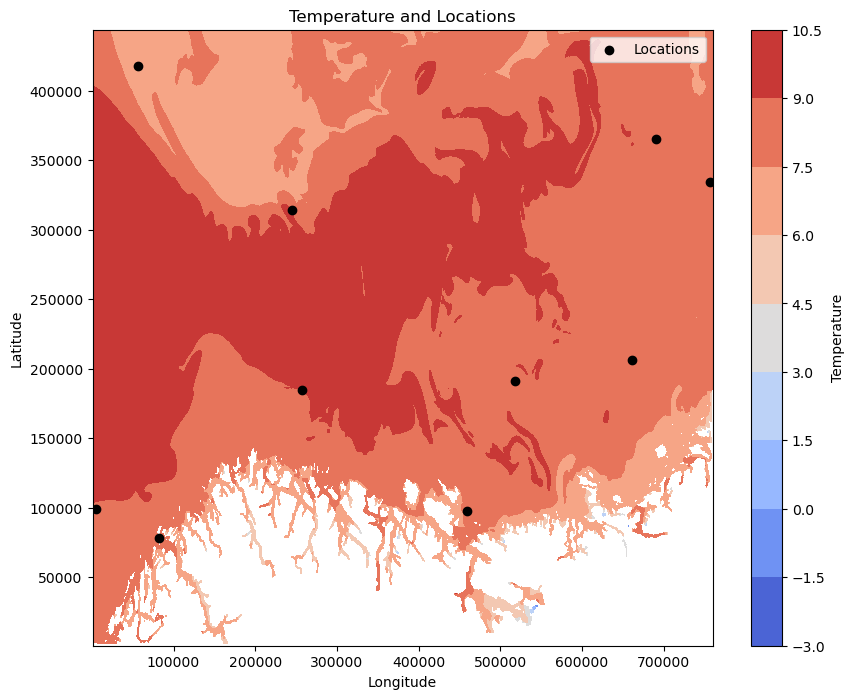

In [4]:
import matplotlib.pyplot as plt

# Open the netCDF file
ds = nc.Dataset(midnor_file)

# Extract the temperature data for the first layer and first time step
temperature = ds.variables['temperature'][0, 0, :, :]

# Extract the grid coordinates
xc = ds.variables['xc'][:]
yc = ds.variables['yc'][:]

# Plot the temperature data
plt.figure(figsize=(10, 8))
plt.contourf(xc, yc, temperature, cmap='coolwarm')
plt.colorbar(label='Temperature')

# Plot the location data on top
plt.scatter(loc_data['x']*800, loc_data['y']*800, color='black', label='Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Temperature and Locations')
plt.show()

In [8]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

env_variables = ["temperature", "salinity", "u_velocity", "v_velocity"]

start = int(200000/800)
subgrid_size = 10

# Extract data for each environmental variable in the subgrid
subgrid_data = {}
for var in env_variables:
    subgrid_data[var] = ds.variables[var][0, 0, start:(start+subgrid_size), start:(start+subgrid_size)]
    subgrid_data[var] = subgrid_data[var].flatten()

# Assuming you have 50x50 grid coordinates in xc and yc (replace these with actual coordinate arrays)
# Create a grid of coordinates (x, y) for the subgrid
subgrid_coords = np.array([(xc[i], yc[j]) for i in range(subgrid_size) for j in range(subgrid_size)])

# Compute pairwise distances (e.g., Euclidean distance)
distance_vector = pdist(subgrid_coords, metric='euclidean')

# Convert the distance vector to a DataFrame with a column heading
distance_df = pd.DataFrame(distance_vector, columns=['pairwise_distance'])

# Optionally, save the distance vector to a CSV file
# distance_df.to_csv("../1_data/2_processed/training/vec_distance_matrix.csv", index=False)

# Combine subgrid data into a single DataFrame
subgrid_df = pd.DataFrame(subgrid_data)

# Fill NaN values with 0
subgrid_df.fillna(-30000, inplace=True)

# Save the DataFrame to a CSV file
# subgrid_df.to_csv("../1_data/2_processed/training/subgrid_data.csv", index=False)


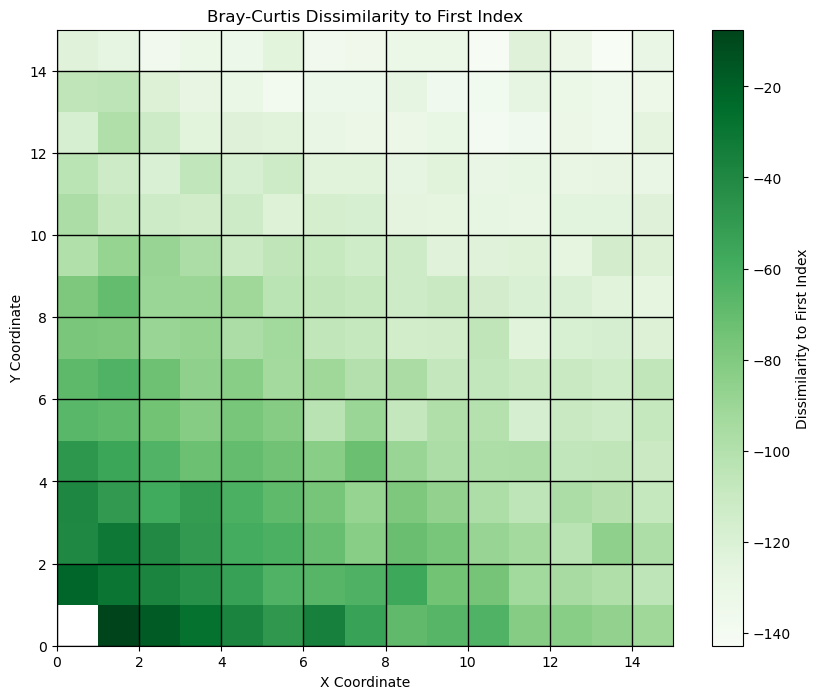

In [ ]:
# Get the predictions

predictions = pd.read_csv("/cluster/home/haroldh/spGDMM/predicted_dissimilarity_matrix.csv")

# Extract the dissimilarity values for the first index
predictions.iloc[0, 0] = np.nan
dissimilarity_to_first = predictions.iloc[0, 0:] Look at and discuss the outputs from last week

import numpy as np
import matplotlib.pyplot as plt

# Assuming `dissimilarity_to_first` is a pandas Series
# Convert to a NumPy array
dissimilarity_to_first = dissimilarity_to_first.values

# Reshape dissimilarity to a grid shape that matches the coordinates' grid
# Assuming it's a square grid (adjust if it's not square)
grid_size = int(np.sqrt(len(dissimilarity_to_first)))  # Calculate grid size based on number of points
dissimilarity_grid = dissimilarity_to_first.reshape((grid_size, grid_size))

# Create the gridded plot with a single color gradient
plt.figure(figsize=(10, 8))
plt.imshow(dissimilarity_grid, cmap='Greens', origin='lower', extent=[0, grid_size, 0, grid_size])
plt.colorbar(label='Dissimilarity to First Index')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Bray-Curtis Dissimilarity to First Index')
plt.grid(True, which='both', axis='both', linestyle='-', color='black', linewidth=1)
plt.show()


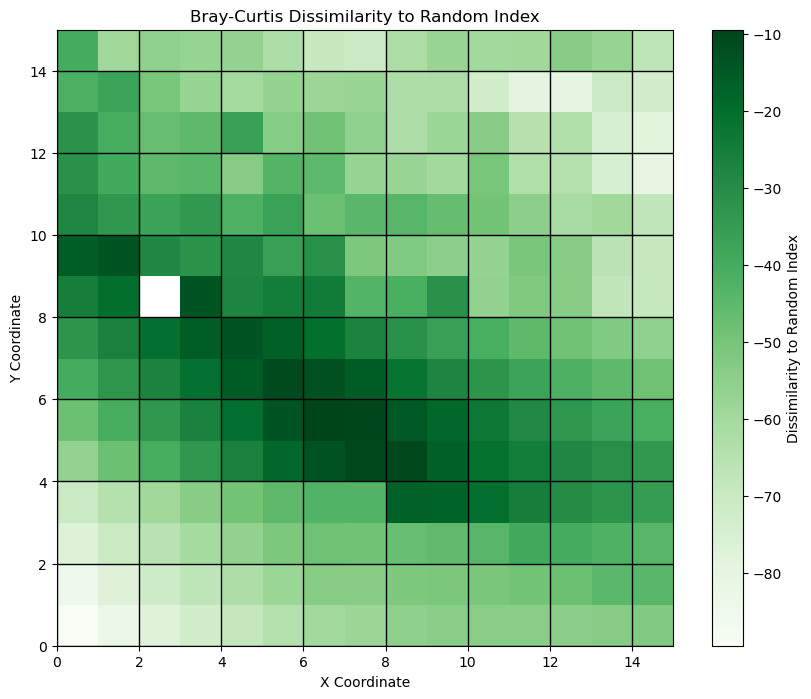

In [10]:
import random

# Select a random index from the predictions DataFrame
random_index = random.randint(0, predictions.shape[0] - 1)

# Extract the dissimilarity values for the random index
predictions.iloc[random_index, random_index] = np.nan
dissimilarity_to_random = predictions.iloc[random_index, :]

# Convert to a NumPy array
dissimilarity_to_random = dissimilarity_to_random.values

# Reshape dissimilarity to a grid shape that matches the coordinates' grid
dissimilarity_grid_random = dissimilarity_to_random.reshape((grid_size, grid_size))

# Create the gridded plot with a single color gradient
plt.figure(figsize=(10, 8))
plt.imshow(dissimilarity_grid_random, cmap='Greens', origin='lower', extent=[0, grid_size, 0, grid_size])
plt.colorbar(label='Dissimilarity to Random Index')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Bray-Curtis Dissimilarity to Random Index')
plt.grid(True, which='both', axis='both', linestyle='-', color='black', linewidth=1)
plt.show()


Index(['Unnamed: 0', 'beta[1]', 'beta[2]', 'beta[3]', 'beta[4]', 'beta[5]',
       'beta[6]', 'beta[7]', 'beta[8]', 'beta[9]', 'beta[10]', 'beta[11]',
       'beta[12]', 'beta[13]', 'beta[14]', 'beta[15]', 'beta[16]', 'beta[17]',
       'beta[18]', 'beta[19]', 'beta[20]', 'beta_0', 'log_beta[1]',
       'log_beta[2]', 'log_beta[3]', 'log_beta[4]', 'log_beta[5]',
       'log_beta[6]', 'log_beta[7]', 'log_beta[8]', 'log_beta[9]',
       'log_beta[10]', 'log_beta[11]', 'log_beta[12]', 'log_beta[13]',
       'log_beta[14]', 'log_beta[15]', 'log_beta[16]', 'log_beta[17]',
       'log_beta[18]', 'log_beta[19]', 'log_beta[20]', 'sigma2'],
      dtype='object')

In [ ]:
# Assuming the first 20 columns in `post_samples` are the coefficients for the 20 predictors
# and that the remaining columns represent other parameters like intercept, etc.
coefficients = post_samples.iloc[:, :20].values  # Shape (10000, 20)

# Assuming that the intercept is included as the 21st column of the posterior samples
intercept = post_samples.iloc[:, 20].values  # Shape (10000,)